In [27]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv(r'D:\Tugas\Sem 5\Mesin Learning\Unsupervised Learning (Praktek)\Unsupervised Learning (Praktek)\Tugas4_A_11745\credit_card.csv')

In [28]:
print("data null \n",credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [29]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

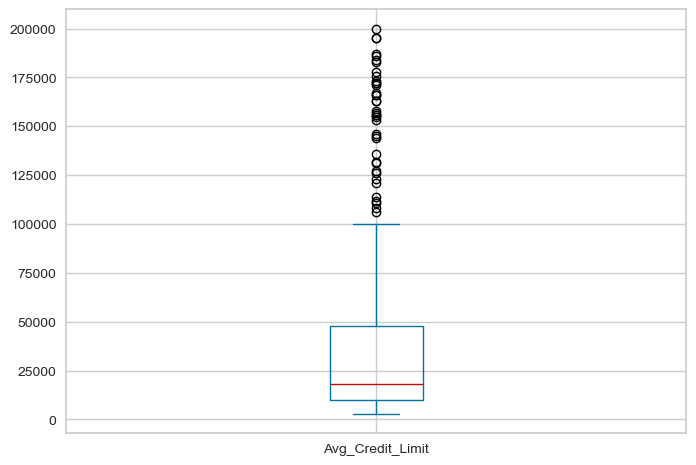

In [30]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 611


<Axes: >

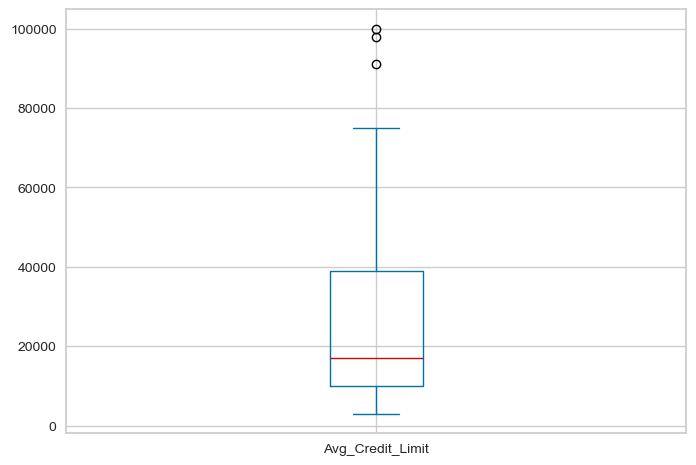

In [31]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    data_bersih = data_frame.copy()  
    for col_name in list(data_frame.columns):
        if is_numeric_dtype(data_frame[col_name]):
            q1 = data_frame[col_name].quantile(0.25)
            q3 = data_frame[col_name].quantile(0.75)

            iqr = q3 - q1
            batas_atas = q3 + (1.5 * iqr)
            batas_bawah = q1 - (1.5 * iqr)

            data_bersih = data_bersih[(data_bersih[col_name] >= batas_bawah) & (data_bersih[col_name] <= batas_atas)]
    return data_bersih

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')


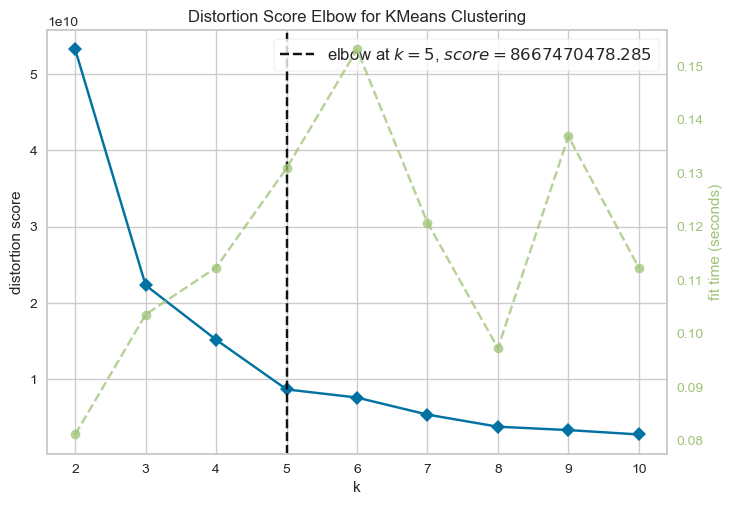

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

KMeansC = KMeans(random_state=45)
vis = KElbowVisualizer(KMeansC,k=(2,11))

vis.fit(data_bersih)

vis.show()

Silhouette Score K-Menas for  2  clusters :  0.7352692159273726
Silhouette Score K-Menas for  3  clusters :  0.715282019294858
Silhouette Score K-Menas for  4  clusters :  0.6029740636276384
Silhouette Score K-Menas for  5  clusters :  0.6202155718607348
Silhouette Score K-Menas for  6  clusters :  0.5784132849561511
Silhouette Score K-Menas for  7  clusters :  0.5847489596837573
Silhouette Score K-Menas for  8  clusters :  0.5807873548788898
Silhouette Score K-Menas for  9  clusters :  0.5644052089505933
Silhouette Score K-Menas for  10  clusters :  0.5480195110286031


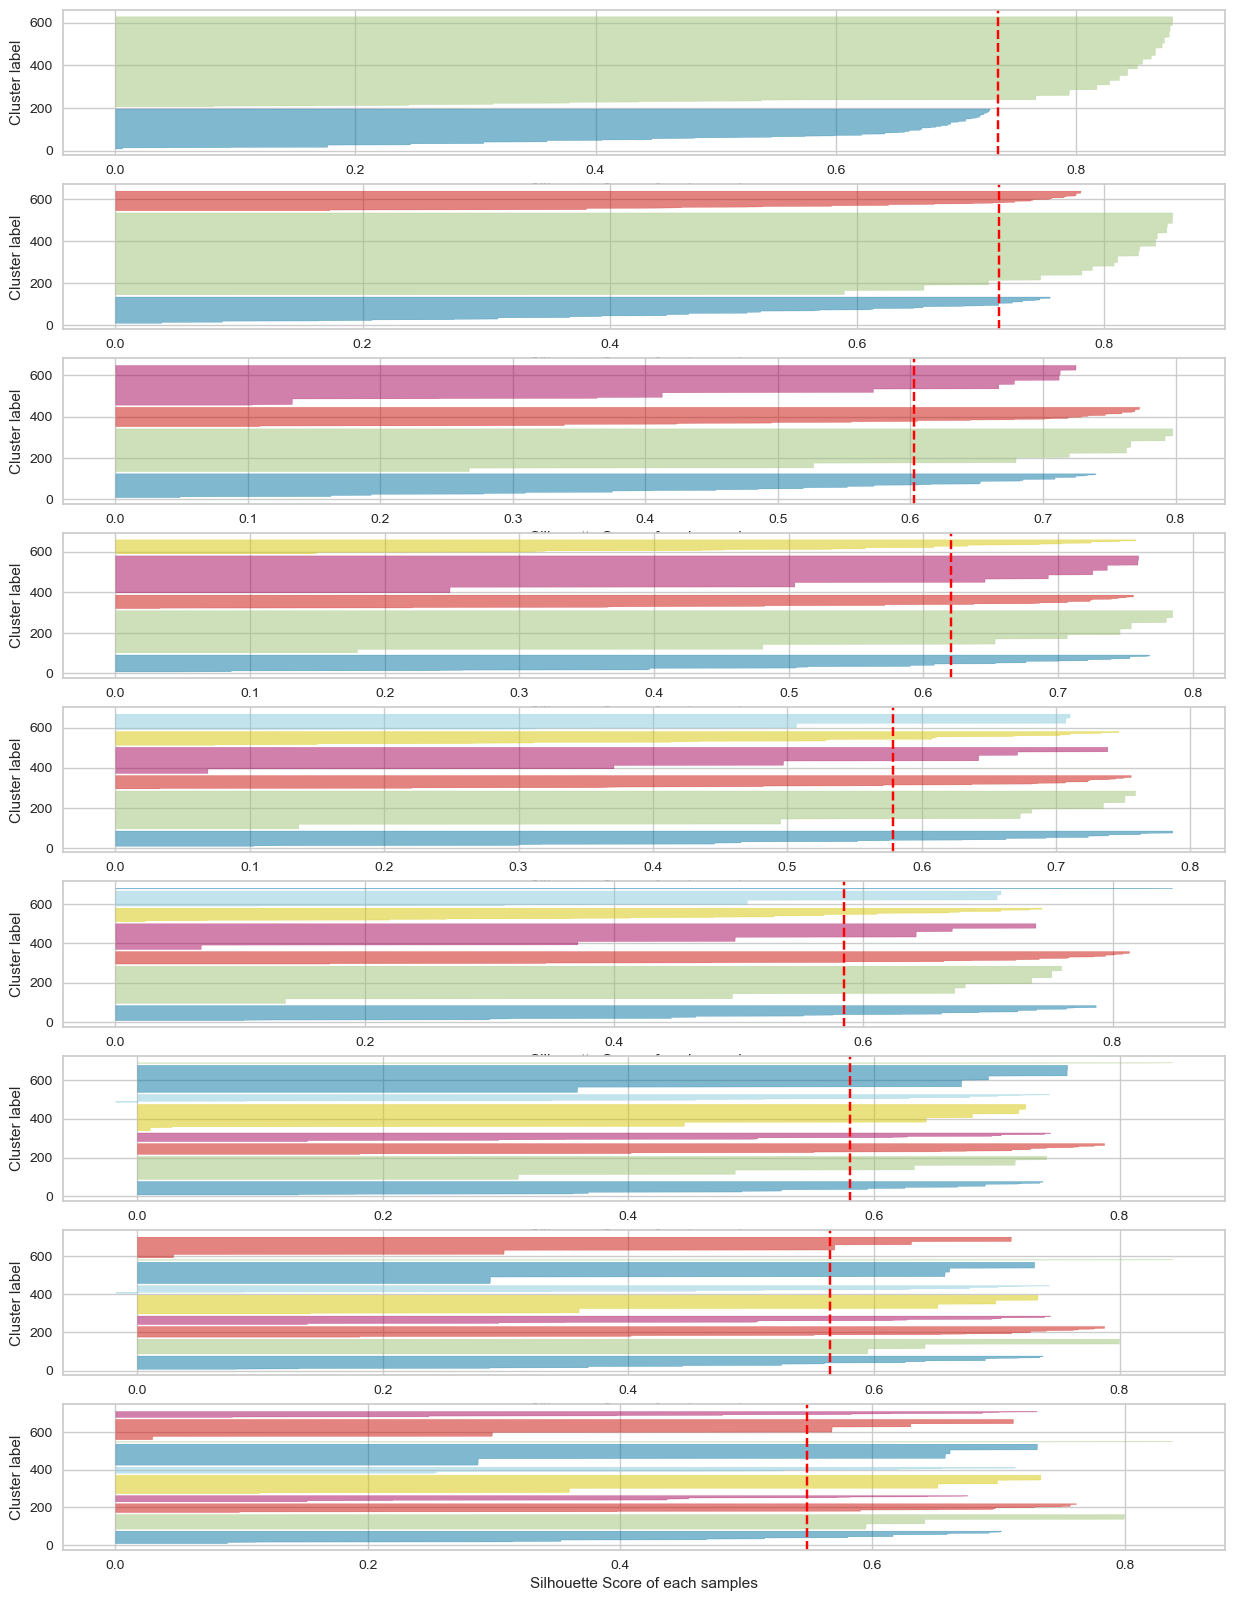

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    KMeansC = KMeans(n_clusters=k, init='k-means++', random_state=45)
    KM_clusters=KMeansC.fit_predict(data_bersih)
    print("Silhouette Score K-Menas for ", k, " clusters : ", silhouette_score(data_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(KMeansC, colors = 'yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [34]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

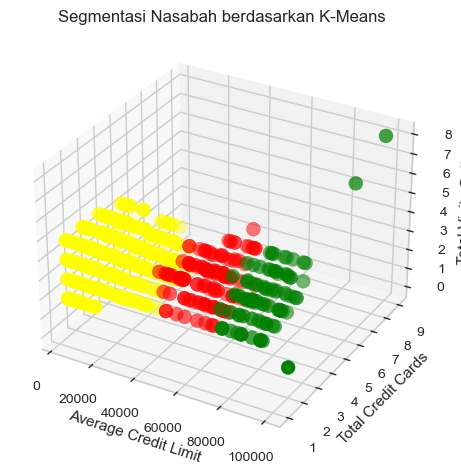

Silhouette Score k-Means: 0.715


In [35]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=45)
K_clusters = kmeans. fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4:'magenta', 5:'black', 6:'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ('Silhouette Score k-Means: %0.3f' % silhouette_score(data_bersih, K_clusters))

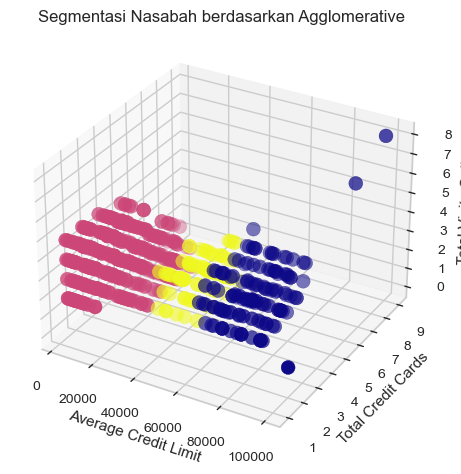

Silhouette Score K-Means: 0.681


In [36]:
import seaborn as sns 
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax. scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters) )


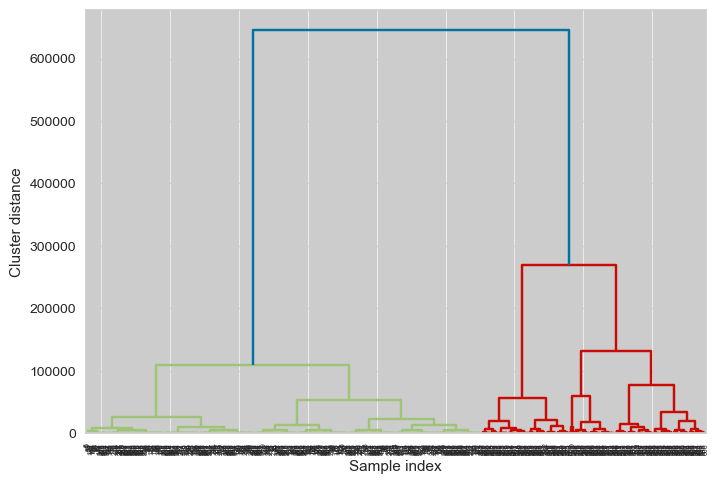

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

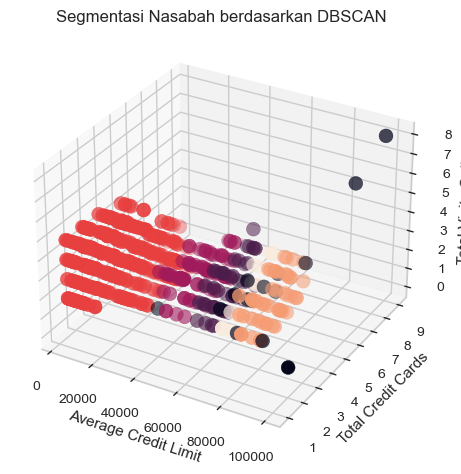

Silhouette Score K-Means: 0.665


In [38]:
DBSC = DBSCAN(min_samples=20,eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap #untuk custom warna cluster

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex()) #membuat color

fig = plt.figure()
ax = plt.axes(projection='3d' )

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], 
          c=DBSC_clusters, cmap=cmap, s=100) 

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit') 
ax.set_ylabel('Total Credit Cards') #Label sumbu y
ax.set_zlabel('Total Visits Online') #Label sumbu z
plt.show() 

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [39]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('SBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print ("Model berhasil disimpan")

Model berhasil disimpan
